In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [23]:
sms = pd.read_csv(r'C:\Users\UmarFarooque\Desktop\spam.csv',encoding='latin-1')

In [24]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
#dataset has extra columns
#renaming v1 and v2

sms.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

sms.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [26]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
sms.shape

(5572, 2)

In [28]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [29]:
#Ratio

print('spam ratio= ',round(len(sms[sms['label']=='spam'])/len(sms.label),2)*100,'%') #spam ratio
print('ham ratio= ',round(len(sms[sms['label']=='ham'])/len(sms.label),2)*100,'%')   #ham ratio

spam ratio=  13.0 %
ham ratio=  87.0 %


In [30]:
#new column for lenth message
sms['length'] = sms.message.str.len()
sms.head(5)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
#label encoding 0 ,1
sms['label'].replace({'ham':0,'spam':1},inplace=True)

In [32]:
#covert all msg to lower case
sms['message'] = sms['message'].str.lower()

In [33]:
sms.head()

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


In [34]:
#replace email adress with email
sms['message'] = sms['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                           'emailaddress')

#replace url with 'webadress'
sms['message'] = sms['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$',
                                           'webadress')
 
#replace money symbols with money symb (£ can be typye by alt+156)

sms['message'] = sms['message'].str.replace(r'£|\$','dollers')

#replacing 10digit numbers including (),__,dashes
sms['message'] = sms['message'].str.replace(r'^\(?[\d{3}\)?[\s-]?[\d]{4}$',
                                            'phonenumber')

#replace numbers with nbrs
sms['message'] = sms['message'].str.replace(r'\d+(\.\d+)?','nmbr')

In [35]:
#remove punctuation
sms['message'] = sms['message'].str.replace(r'[^\w\d\s]',' ')

#remove whitespace between terms with single space

sms['message'] = sms['message'].str.replace(r'\s+',' ')

#remove leading amd trailing whitespace
sms['message'] = sms['message'].str.replace(r'^\s+|\s+?$','')

In [36]:
sms.head()

,label,message,length
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in nmbr a wkly comp to win fa cup f...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i don t think he goes to usf he lives arou...,61


In [37]:
#removing stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')+['u','ur','4','2','im','dont','doin','ure'])

sms['message'] = sms['message'].apply(lambda x:' '.join(
    term for term in x.split() if term not in stop_words))

In [38]:
sms['clean_length'] = sms.message.str.len()
sms.head()

,label,message,length,clean_length
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,ok lar joking wif oni,29,21
2,1,free entry nmbr wkly comp win fa cup final tkt...,155,133
3,0,dun say early hor c already say,49,31
4,0,nah think goes usf lives around though,61,38


In [39]:
sms.length.sum()

446422

In [40]:
sms.clean_length.sum()

296124

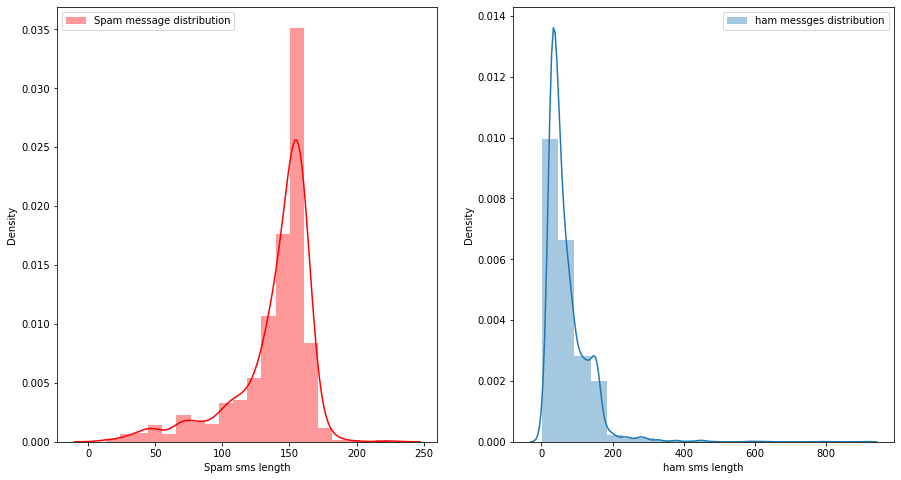

In [41]:
#message distribution before cleaning
f,ax = plt.subplots(1,2,figsize=(15,8))
sns.distplot(sms[sms['label']==1]['length'],bins = 20,ax=ax[0],label='Spam message distribution',color='r')


ax[0].set_xlabel('Spam sms length')
ax[0].legend()


sns.distplot(sms[sms['label']==0]['length'],bins=20,ax=ax[1],label='ham messges distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()


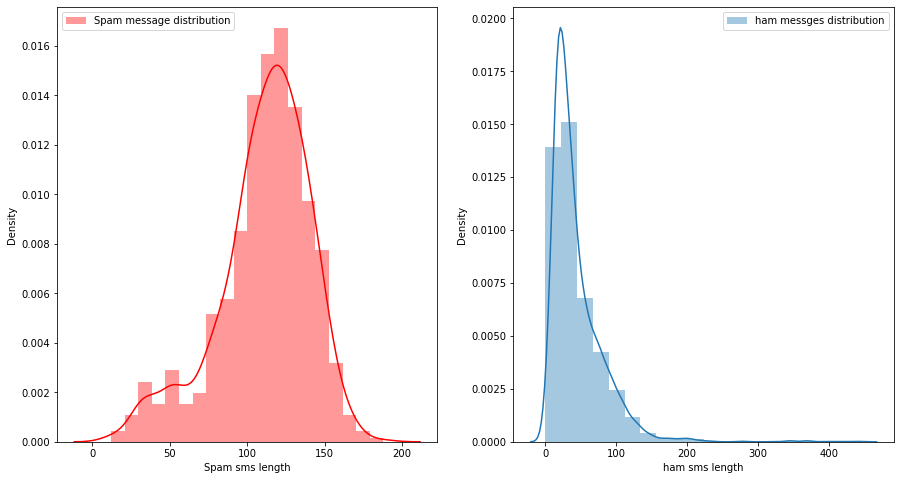

In [42]:
#message distribution after cleaning
f,ax = plt.subplots(1,2,figsize=(15,8))
sns.distplot(sms[sms['label']==1]['clean_length'],bins = 20,ax=ax[0],label='Spam message distribution',color='r')


ax[0].set_xlabel('Spam sms length')
ax[0].legend()


sns.distplot(sms[sms['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messges distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

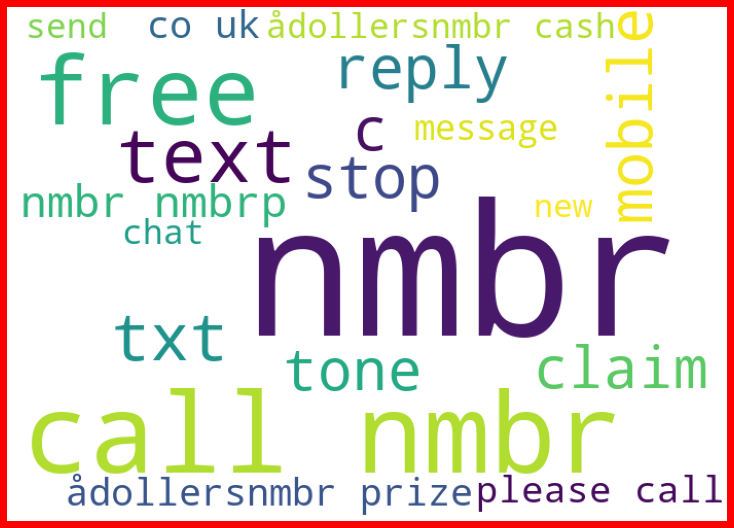

In [45]:
from wordcloud import WordCloud

spams = sms['message'][sms['label']==1]  #spam data=1

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))


plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

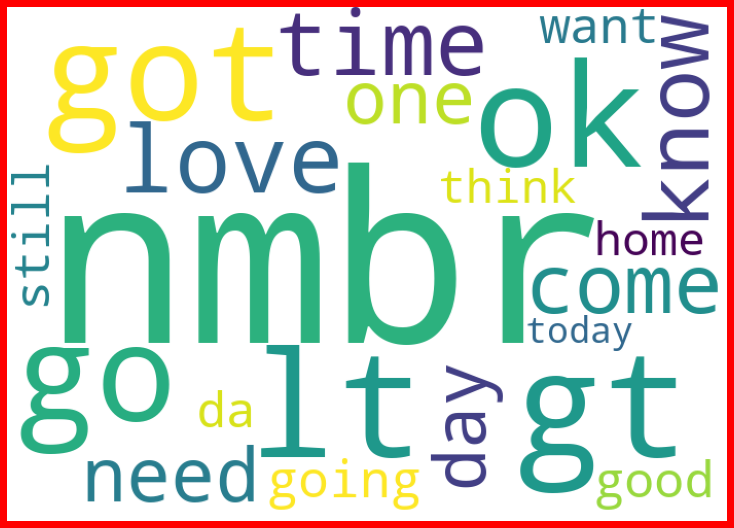

In [46]:
from wordcloud import WordCloud

spams = sms['message'][sms['label']==0]  #ham msges =0

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))


plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [51]:
#convert text into vectors using tfidf

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(sms['message'])


X=features
y=sms['label']

In [52]:
#train and predict


X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred = naive.predict(x_test)


print('Final score ==>',accuracy_score(y_test,y_pred))

Final score ==> 0.9705671213208902


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1202
           1       1.00      0.79      0.88       191

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393



NameError: name 'ax_set_xlabel' is not defined

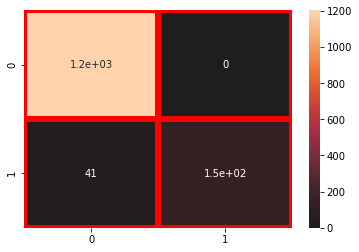

In [55]:
conf_mat = confusion_matrix(y_test,y_pred)

ax = plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidth=5,linecolor='r',center=0)

ax_set_xlabel('predicted labels');ax.set_ylabel('True_Labels')


ax.set_title('Confusion_matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [56]:
conf_mat

array([[1202,    0],
       [  41,  150]], dtype=int64)